## Kaggle Titanic
### feat1/wip
This branch is the version where we keep all NaN feature to see change in performance.

In [95]:
%%bash
git add Titanic.ipynb
git commit -m 'Finised testing this version'
git push --set-upstream origin feat1/wip

[feat1/wip 41ddc0a] Finised testing this version
 1 file changed, 11 insertions(+), 18 deletions(-)
Branch feat1/wip set up to track remote branch feat1/wip from origin.


To github.com:Theerit/Kaggle_Titanic.git
   704abb3..41ddc0a  feat1/wip -> feat1/wip


As usual, import all neccasary stuff into the notebook

In [52]:
%matplotlib inline 
import requests 
import StringIO
import zipfile
import numpy as np
import pandas as pd # pandas
import matplotlib.pyplot as plt # module for plotting 

# If this module is not already installed, you may need to install it. 
# You can do this by typing 'pip install seaborn' in the command line
import seaborn as sns 

import sklearn.model_selection

First, I will start by loading the data in panda dataframe and do some EDA.

In [53]:
train = pd.read_csv('Train.csv')
#test = pd.read_csv('Test.csv')
print(train.shape)

(891, 12)


Take a peek look at raw data table.

In [54]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


It appears that the test data has no label(answer class) and seems to serve submission function. Cross validation and model evaluation will be done based on the data provided in Train.csv file only. Next, split dataframe into X and Y dataframe where X store the data while Y store the label.

In [55]:
X = train.copy()
#X = X.drop('Survived',axis=1)
X = X.drop('PassengerId',axis=1)  # Shouldn't relate to survival chance
Y = pd.DataFrame(train['Survived'])

### Label Class Distribution
Lets take a look at class (Survived) distribution, the distribution is slightly skew where more passengers didn't survive.

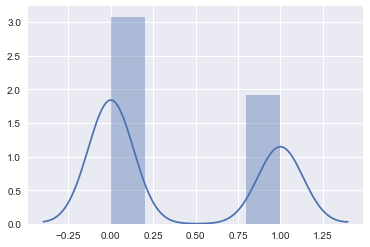

In [56]:
#Y_dist=pd.DataFrame(Y.label.value_counts())
#Y_dist = Y_dist.reset_index()
#Y_dist.columns = ['label','count']
#Y_dist = Y_dist.set_index('label').sort_index().reset_index()
sns.distplot(Y);

Sanitizing data, finding all NaN data in X

In [57]:
X.isnull().any()

Survived    False
Pclass      False
Name        False
Sex         False
Age          True
SibSp       False
Parch       False
Ticket      False
Fare        False
Cabin        True
Embarked     True
dtype: bool

So Age,Cabin and Embarked have NaN value. This version consider keeping them.

### Numerical Distribution Plots
Take a look at each numerical atrributes distribution.

ValueError: cannot convert float NaN to integer

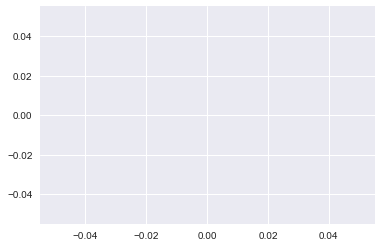

In [58]:
#Divide Numerical and Categorical attributes
#Pclass is actually categorical
num_attri = ['Age','SibSp','Parch','Fare']
cat_attri = [column for column in X if (column not in num_attri and column != 'Survived')]
#print(num_attri)
#print(cat_attri)
#Plot numerical variables
for i,column in enumerate(num_attri):
    #print(column)
    plt.figure(i)
    sns.distplot(X[column])

### Categorical Bar Plots
Now, for categorical attributes, make a bar plot.

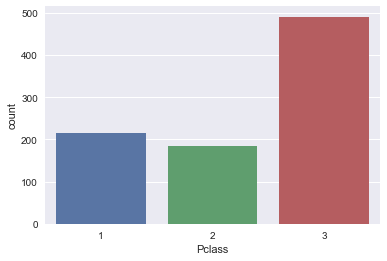

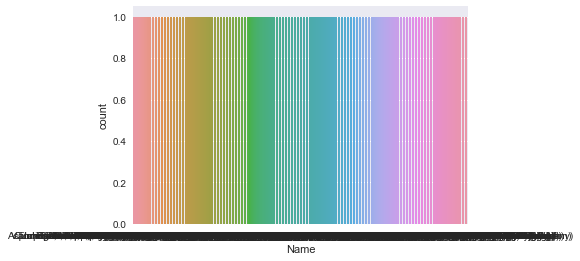

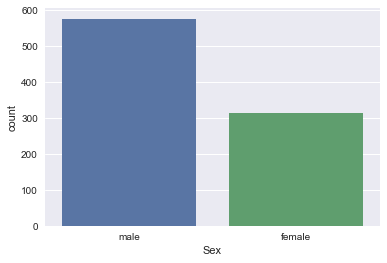

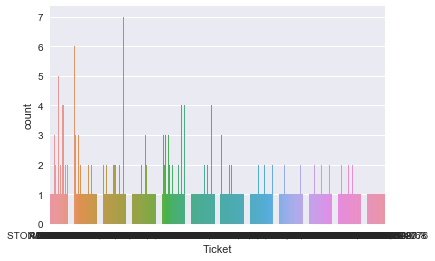

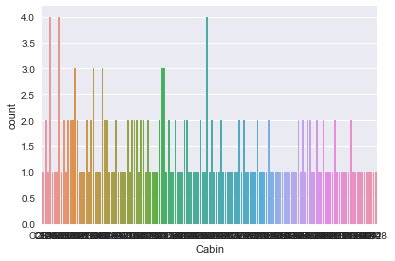

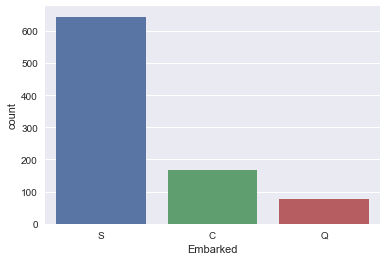

In [59]:
for i,column in enumerate(cat_attri):
    #Lets just keep every categorical attributes for plotting
    plt.figure(i)
    sns.countplot(X[column])

Observation: Majority of Pclass is class 1. Name, as one might expected, is equally distributed (one count for each name). Sex count is equal. Some spikes in Ticket and Cabin. Very small Q (Queenstown) counts for Embarked.

### Pairplot
Make a pairplot for all numerical variables

ValueError: max must be larger than min in range parameter.

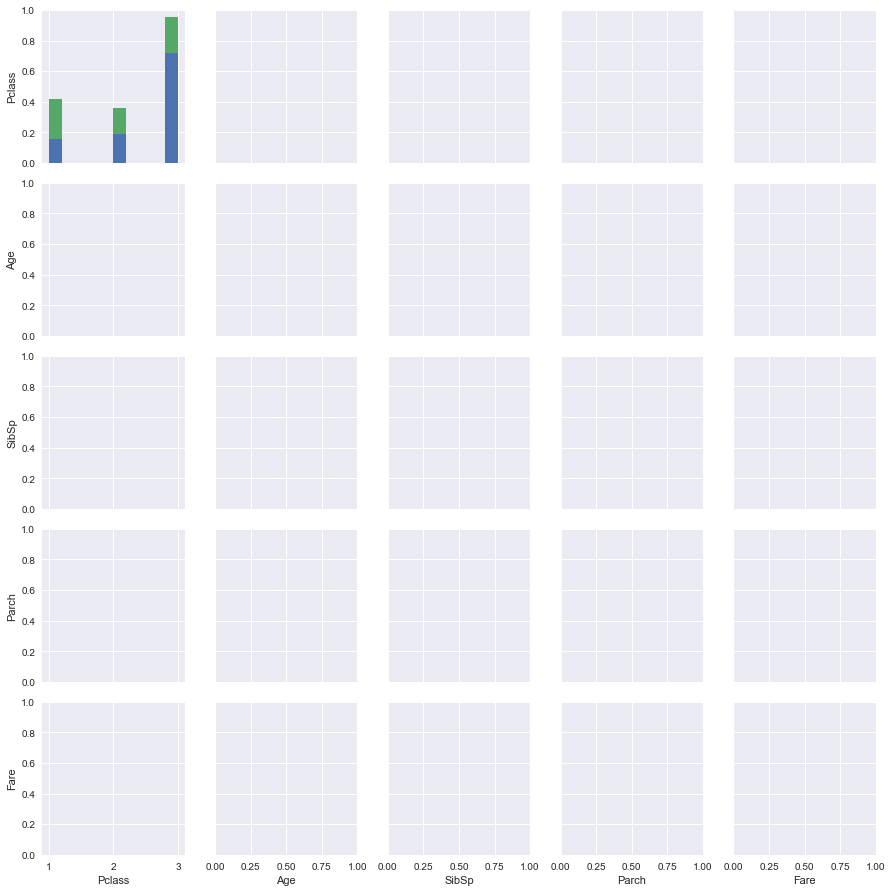

In [60]:
# Make new dataframe for pairplot purpose
X_pairplot = X.copy()
X_pairplot.loc[X_pairplot['Survived']==1,'Survived'] = 'Survived'
X_pairplot.loc[X_pairplot['Survived']==0,'Survived'] = 'Not Survived'

#X_pairplot[Survived=0] = 'Not Survived'

#Add Survived category to numerical attributes for plotting purpose
if 'Survived' not in num_attri:
    num_attri = num_attri + ['Survived']
    
g = sns.pairplot(X_pairplot,hue='Survived')

### Dummy Variables
For starter, create dummy variables for categorical features.

In [67]:
for column in (cat_attri):
    #Lets just keep every categorical attributes for plotting
    tempDF = pd.get_dummies(X[column],prefix=column)
    X.drop(column,axis=1,inplace=True)
    X = X.join(tempDF)

In [68]:
X.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


### Feature Evaluation
For starter using random forest to evaluate feature importance.
Code shamelessly brought from:http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

In [69]:
#Format dataframe for scikit training
y = X['Survived']
X.drop('Survived',axis=1,inplace=True)

Start with numerical feature ranking first

In [71]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features
#X, y = make_classification(n_samples=1000,
#                           n_features=10,
#                          n_informative=3,
#                           n_redundant=0,
#                           n_repeated=0,
#                           n_classes=2,
#                           random_state=0,
#                           shuffle=False)

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
#print("Feature ranking:")

#for f in range(X.shape[1]):
#    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(18,14))
plt.title("Feature importances")
#plt.bar(range(X.shape[1]), importances[indices],
#       color="r", yerr=std[indices], align="center")

plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")

plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

### Model Training
For the sake of early versions use all features for learning. Use 5 fold CV grid search (with 1 fold labelled test set and will not be the part of parameter tuning)

First split into 4:1 train/CV and test dataset

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Evaluate CV with AUC, but will also consider Accuracy performance of the model.

In [74]:
import xgboost as xgb
from sklearn.grid_search import GridSearchCV

clf = xgb.XGBClassifier(
        nthread = 1,
        silent = 1,
        )
# specify parameters via map
parameters = {'objective':['binary:logistic'],
              'learning_rate': [0.05], #so called `eta` value
              'max_depth': np.arange(1,11,1),
              'subsample': np.arange(0.1,0.9,0.1).tolist(),
              'colsample_bytree': np.arange(0.5,0.9,0.1).tolist()}
clf = GridSearchCV(clf, parameters, n_jobs=1, 
                   cv=4, 
                   scoring='roc_auc',
                   verbose=2, refit=False)
clf.fit(X_train,y_train)
best_param_4CV = clf.best_params_

Fitting 4 folds for each of 320 candidates, totalling 1280 fits
[CV] objective=binary:logistic, subsample=0.1, learning_rate=0.05, colsample_bytree=0.5, max_depth=1 
[CV]  objective=binary:logistic, subsample=0.1, learning_rate=0.05, colsample_bytree=0.5, max_depth=1 -   0.4s
[CV] objective=binary:logistic, subsample=0.1, learning_rate=0.05, colsample_bytree=0.5, max_depth=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  objective=binary:logistic, subsample=0.1, learning_rate=0.05, colsample_bytree=0.5, max_depth=1 -   0.4s
[CV] objective=binary:logistic, subsample=0.1, learning_rate=0.05, colsample_bytree=0.5, max_depth=1 
[CV]  objective=binary:logistic, subsample=0.1, learning_rate=0.05, colsample_bytree=0.5, max_depth=1 -   0.4s
[CV] objective=binary:logistic, subsample=0.1, learning_rate=0.05, colsample_bytree=0.5, max_depth=1 
[CV]  objective=binary:logistic, subsample=0.1, learning_rate=0.05, colsample_bytree=0.5, max_depth=1 -   0.4s
[CV] objective=binary:logistic, subsample=0.2, learning_rate=0.05, colsample_bytree=0.5, max_depth=1 
[CV]  objective=binary:logistic, subsample=0.2, learning_rate=0.05, colsample_bytree=0.5, max_depth=1 -   0.4s
[CV] objective=binary:logistic, subsample=0.2, learning_rate=0.05, colsample_bytree=0.5, max_depth=1 
[CV]  objective=binary:logistic, subsample=0.2, learning_rate=0.05, colsample_bytree=0.5, max_depth=1 -   0.4s
[CV] objective=binary:logistic, subsa

[Parallel(n_jobs=1)]: Done 1280 out of 1280 | elapsed: 35.8min finished


In [75]:
print('Best AUC score:'+str(clf.best_score_))
print('Best Param:' +str(clf.best_params_))

Best AUC score:0.861990722065
Best Param:{'objective': 'binary:logistic', 'subsample': 0.5, 'learning_rate': 0.05, 'colsample_bytree': 0.7999999999999999, 'max_depth': 9}


Now considering accuracy performance of the model on CV set.

In [76]:
clf2 = xgb.XGBClassifier(
        nthread = 1,
        silent = 1,
        colsample_bytree = best_param_4CV['colsample_bytree'],
        learning_rate = best_param_4CV['learning_rate'],
        max_depth =  best_param_4CV['max_depth'],
        objective = best_param_4CV['objective'],
        subsample = best_param_4CV['subsample']
        )
clf2.fit(X_train,y_train)
from sklearn.metrics import accuracy_score
print('Accuracy:'+str(accuracy_score(y_train,clf2.predict(X_train))))

Accuracy:0.911516853933


Performance on test set.

In [77]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
print('Test set AUC score:'+str(roc_auc_score(y_test,clf2.predict(X_test))))
print('Test set Accuracy:'+str(accuracy_score(y_test,clf2.predict(X_test))))

Test set AUC score:0.814478764479
Test set Accuracy:0.826815642458
